# Notebook to prepare the dataset EMOVO for the training

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import librosa
import librosa.display
from IPython.display import Audio
import pandas as pd

## Load an audio and shows his waveform

(137216,) 48000


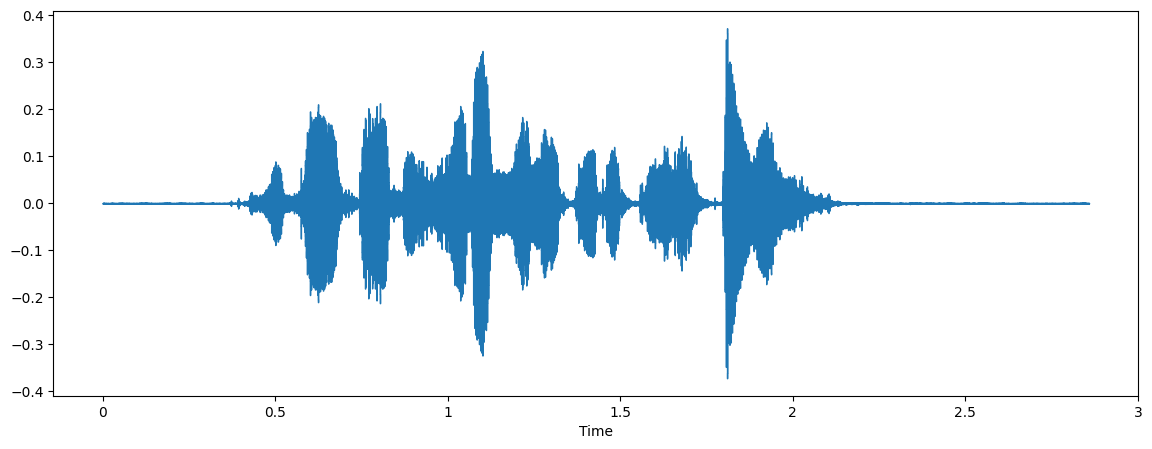

In [2]:
file = 'audio' +os.sep+ 'f1' +os.sep+ 'dis-f1-b2.wav'

x, sr = librosa.load(file, sr=None)

print(x.shape, sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
Audio(file, rate=sr)

## Convert the audio waveform to spectrogram

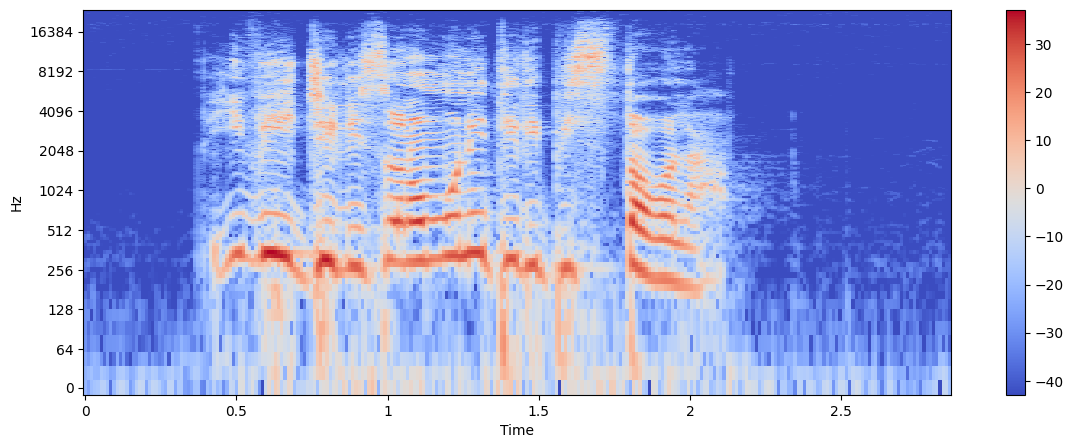

In [3]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Transform the dataset from files .wav to MEL Spectrogram .png

In [4]:
folders = ['f1', 'f2', 'f3', 'm1', 'm2', 'm3']
labels = ['dis', 'gio', 'neu', 'pau', 'rab', 'sor', 'tri']
full_labels = ['disgusto', 'gioia', 'neutro', 'paura', 'rabbia', 'sorpresa', 'tristezza']

# file_name,classID,class
df = pd.read_csv('documents'+os.sep+'emovo.csv')

for folder in folders:
    folder = 'audio' +os.sep+ folder
    files = os.listdir(folder)
    
    for file in files:
        x, sr = librosa.load(folder + os.sep + file, sr=None)
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        
        plt.figure(figsize=(7, 5))
        librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
        plt.axis('off')
        
        category = labels.index(file.strip().split('-')[0])
        label = full_labels[category]
        save_path = 'images' +os.sep+ file +'.png'
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
        plt.close()
        
        df.loc[df.size] = {'file_name': save_path, 'classID': category, 'class':label}
        
df.to_csv('documents'+os.sep+'emovo.csv', index=False)
df.head()